# Example 9

In [ ]:
from uq_physicell.abc import CalibrationContext, run_abc_calibration
from pyabc import RV, Distribution, visualization
import logging
import numpy as np
import matplotlib.pyplot as plt

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Real values for obs. data
dic_real_value = {'growth_rate': 0.00072}

# File name
db_path = "ex9_ABC_Calib.db"
obs_data_path = "obsData.csv"

## Configuration Setup

Define all the configuration parameters needed for ABC-SMC calibration.

In [ ]:
# Model configuration
model_config = {
    'ini_path': "configFile.ini", 
    'struc_name': "struc_prolif", 
}

# Quantities of Interest (QoI) functions
qoi_functions = {
    "live_cells": "lambda df: len(df[df['dead'] == False])",
}

# Mapping of QoI names to observed data columns
obs_data_columns = {
    'time': "Time", 
    "live_cells": "Cell_Count", 
}

def euclidean_distance(data1, data2):
    """Simple distance function for live_cells QoI"""
    try:
        # Handle dictionary inputs
        if isinstance(data1, dict):
            obs_vals = np.array(data1['live_cells'])
            sim_vals = np.array(data2['live_cells'])
        else:  # DataFrame inputs
            obs_vals = np.array(data1['live_cells'])
            sim_vals = np.array(data2['live_cells'])

        return np.sum((obs_vals - sim_vals)**2)
    except:
        return float('inf')

# Distance functions for ABC
distance_functions = {
    "live_cells": {"function": euclidean_distance, "weight": 1.0}
}

# Define prior distributions using pyABC
prior = Distribution(
    growth_rate=RV("uniform", 0.0005, 0.0003),  # uniform between 0.0005 and 0.0008 (0.0005 + 0.0003) -> cell cycle between ~20.8 hrs and ~33.3 hrs
)

# ABC options (configured for demonstration)
abc_options = {
    'max_populations': 8,           # Number of ABC-SMC populations
    'max_simulations': 400,         # Maximum total simulations
    'population_strategy': 'adaptive',
    'min_population_size': 30,      # Minimum particles per population
    'max_population_size': 100,     # Maximum particles per population
    'epsilon_strategy': 'quantile',
    'epsilon_alpha': 0.5,           # 50% quantile for tolerance
    'transition_strategy': 'multivariate',
    'adaptive_distance': True,
    'adaptive_distance_file': 'ex9_adaptive_weights.json',
    'sampler': 'multicore',
    'num_workers': 6,
    'mode': 'local',                # Use local mode for demonstration
    'log_scale': False,
}

print("✅ Configuration setup complete")
print(f"📊 Real values: {dic_real_value}")

✅ Configuration setup complete
📊 Real values: {'growth_rate': 0.00072}


## Create CalibrationContext

Initialize the CalibrationContext with all the configuration parameters.

In [3]:
# Create the calibration context
calib_context = CalibrationContext(
    db_path=db_path,
    obsData=obs_data_path,
    obsData_columns=obs_data_columns,
    model_config=model_config,
    qoi_functions=qoi_functions,
    distance_functions=distance_functions,
    prior=prior,
    abc_options=abc_options,
    logger=logger
)

print("✅ CalibrationContext created successfully")
print(f"📁 Database: {calib_context.db_path}")
print(f"🎯 QoIs: {list(calib_context.qoi_functions.keys())}")
print(f"🔍 Parameters: {list(calib_context.prior.keys())}")
print(f"⚙️ Sampler: {calib_context.sampler_type} with {calib_context.num_workers} workers")

✅ CalibrationContext created successfully
📁 Database: ex9_ABC_Calib.db
🎯 QoIs: ['live_cells']
🔍 Parameters: ['growth_rate']
⚙️ Sampler: multicore with 6 workers


In [4]:
# Run the ABC-SMC calibration with real PhysiCell model
print("🚀 Starting ABC-SMC calibration with PhysiCell model...")
print(f"🎯 Target parameters: {dic_real_value}")
print(f"📊 Max populations: {calib_context.max_populations}")
print(f"🔬 Max simulations: {calib_context.max_simulations}")

# You can uncomment the following code when you have a working PhysiCell setup
try:
    history = run_abc_calibration(calib_context=calib_context)
    
    print("🎉 ABC-SMC calibration completed successfully!")
    print(f"📊 Final populations: {history.n_populations}")
    print(f"🔬 Total simulations: {history.total_nr_simulations}")
    
except Exception as e:
    print(f"❌ Calibration failed: {e}")
    import traceback
    traceback.print_exc()

ABC.Sampler INFO: Parallelize sampling on 3 processes.
INFO:ABC.Sampler:Parallelize sampling on 3 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2025-10-15 10:41:27>
INFO:ABC.History:Start <ABCSMC id=1, start_time=2025-10-15 10:41:27>
ABC INFO: Calibration sample t = -1.
INFO:ABC:Calibration sample t = -1.


🚀 Starting ABC-SMC calibration with PhysiCell model...
🎯 Target parameters: {'growth_rate': 0.00072}
📊 Max populations: 8
🔬 Max simulations: 400


ABC INFO: t: 0, eps: 2.15131250e+04.
INFO:ABC:t: 0, eps: 2.15131250e+04.
ABC INFO: Accepted: 100 / 242 = 4.1322e-01, ESS: 1.0000e+02.
INFO:ABC:Accepted: 100 / 242 = 4.1322e-01, ESS: 1.0000e+02.
ABC.Adaptation INFO: Change nr particles 100 -> 36
INFO:ABC.Adaptation:Change nr particles 100 -> 36
ABC INFO: t: 1, eps: 5.17462500e+03.
INFO:ABC:t: 1, eps: 5.17462500e+03.
ABC INFO: Accepted: 36 / 103 = 3.4951e-01, ESS: 3.2243e+01.
INFO:ABC:Accepted: 36 / 103 = 3.4951e-01, ESS: 3.2243e+01.
ABC.Adaptation INFO: Change nr particles 36 -> 30
INFO:ABC.Adaptation:Change nr particles 36 -> 30
ABC INFO: Stop: Total simulations budget.
INFO:ABC:Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=1 day, 3:35:30.100864, end_time=2025-10-16 14:16:57>
INFO:ABC.History:Done <ABCSMC id=1, duration=1 day, 3:35:30.100864, end_time=2025-10-16 14:16:57>


🎉 ABC-SMC calibration completed successfully!
📊 Final populations: 2
🔬 Total simulations: 445


## Analysis of Results

After calibration, you can analyze the results using pyABC's built-in tools.


📈 ABC-SMC Evolution:
   Total populations: 2
   Total simulations: 445


name,growth_rate
id,
102,0.000735
103,0.000695
104,0.000701
105,0.000703
106,0.000730



🎯 Parameter Recovery Analysis:
   growth_rate:
     True value: 0.000720
     Posterior mean: 0.000711 ± 0.000035
     Relative error: 1.3%


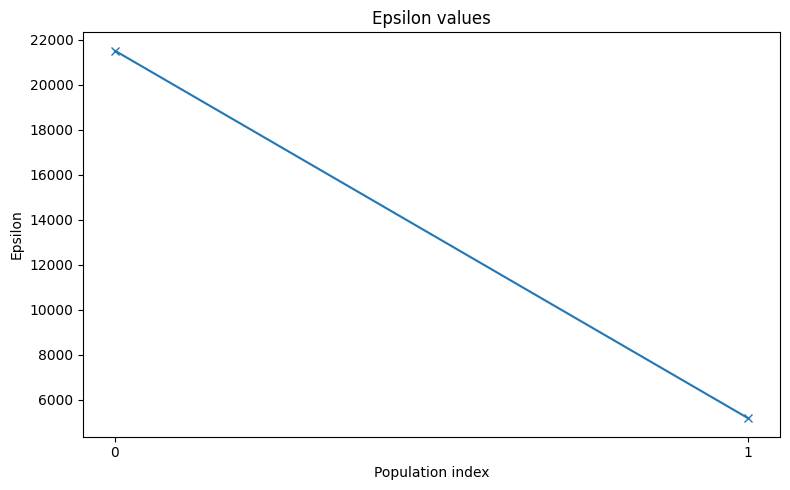

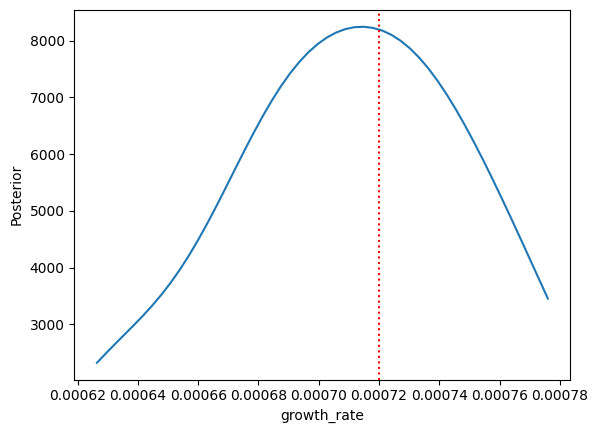

In [27]:
# Analysis of Results (run this cell after successful calibration)
import pyabc


try:
    # Evolution of populations
    print(f"\n📈 ABC-SMC Evolution:")
    print(f"   Total populations: {history.n_populations}")
    print(f"   Total simulations: {history.total_nr_simulations}")
    
    # Plot population evolution if multiple populations
    if history.n_populations > 1:
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        visualization.plot_epsilons(history, yscale='linear', ax=ax)
        
    # Get the posterior samples from the last population
    df_posterior, w = history.get_distribution(m=0, t=history.max_t)
    display(df_posterior.head())
    # Compare with true values
    print(f"\n🎯 Parameter Recovery Analysis:")
    for param in dic_real_value.keys():
        true_val = dic_real_value[param]
        posterior_mean = df_posterior[param].mean()
        posterior_std = df_posterior[param].std()
        print(f"   {param}:")
        print(f"     True value: {true_val:.6f}")
        print(f"     Posterior mean: {posterior_mean:.6f} ± {posterior_std:.6f}")
        print(f"     Relative error: {abs(posterior_mean - true_val) / true_val * 100:.1f}%")
    
    # Plot posterior distributions
    if (len(dic_real_value) > 1):
        visualization.plot_kde_matrix(df_posterior, w, refval=dic_real_value, refval_color="red")
    else:
        visualization.plot_kde_1d(df_posterior, w, param, refval=dic_real_value, refval_color="red")        
except NameError:
    print("📈 Run the calibration first to analyze results")
except Exception as e:
    print(f"❌ Analysis failed: {e}")

In [21]:
x_vals, pdf = visualization.kde.kde_1d(df_posterior, w, 'growth_rate')
arg_max = np.argmax(pdf)
print(f"Most probable growth_rate: {x_vals[arg_max]:.6f}")

Most probable growth_rate: 0.000715


[<Axes: title={'center': 'Parameter growth_rate'}, xlabel='Population t', ylabel='growth_rate'>]

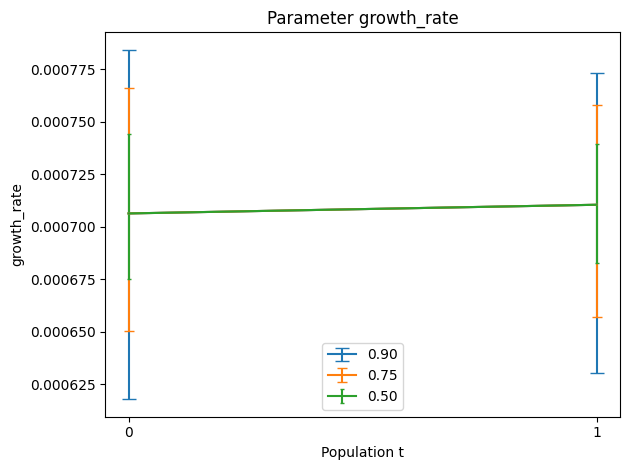

In [26]:
visualization.plot_credible_intervals(history, m=0, levels=[0.5, 0.75, 0.9])